In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
plt.style.use('ggplot')
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("student_data.csv")

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [264]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'sex_M', 'guardian_mother',
       'guardian_other', 'reason_home', 'reason_other', 'reason_reputation',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'famsize_LE3', 'school_MS', 'address_U', 'Pstatus_T'],
      dtype='object')

In [6]:
df.shape

(395, 33)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [8]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
for column in df.columns:
    print(column, df[column].unique())

school ['GP' 'MS']
sex ['F' 'M']
age [18 17 15 16 19 22 20 21]
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 2 1]
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
Dalc [1 2 5 3 4]
Walc [1 3 2 4 5]
health [3 5 1 2 4]
absences [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1 [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2 [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3 [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


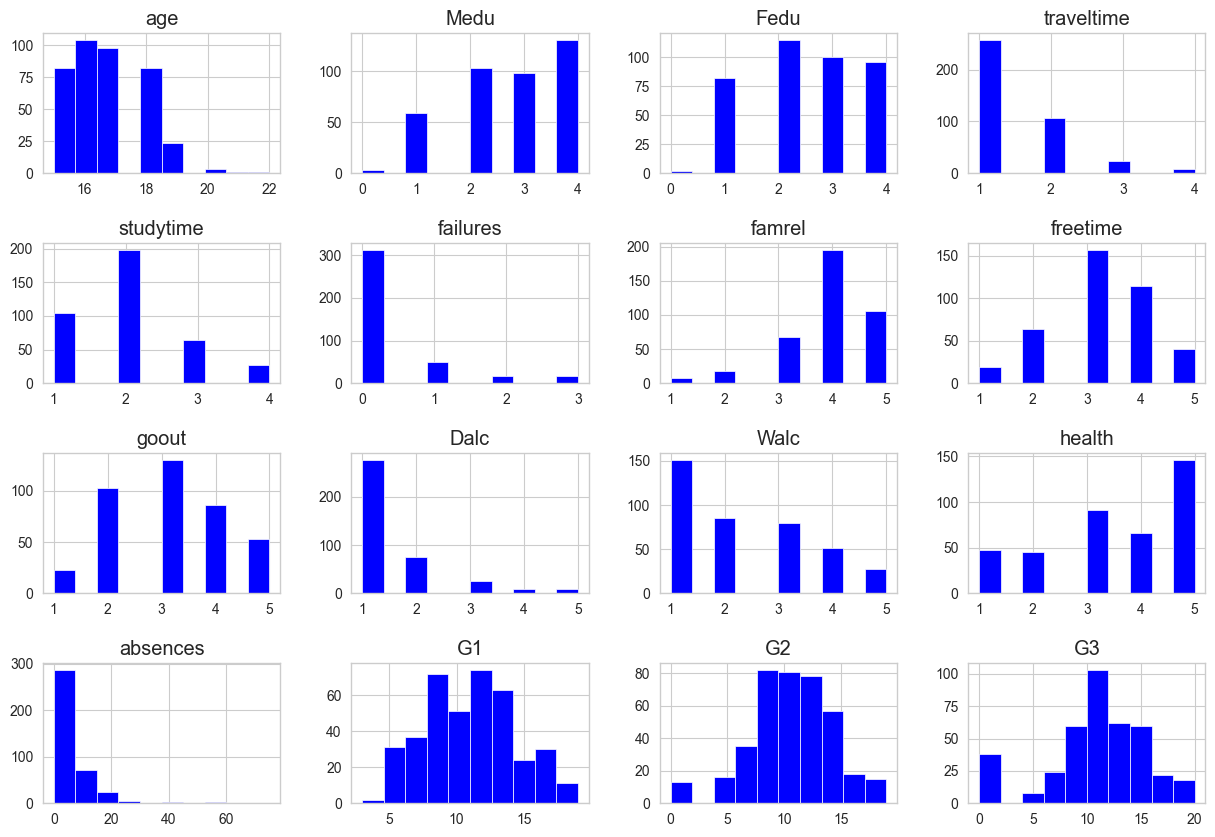

In [10]:
df.hist(figsize=(15,10), color = 'blue')
plt.subplots_adjust(hspace=0.5);

In [11]:
df.replace({'yes': 1, 'no': 0}, inplace=True)

In [12]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

In [13]:
df = pd.get_dummies(df, columns=['guardian'], drop_first=True)
df = pd.get_dummies(df, columns=['reason'], drop_first=True)
df = pd.get_dummies(df, columns=['Fjob'], drop_first=True)
df = pd.get_dummies(df, columns=['Mjob'], drop_first=True)
df = pd.get_dummies(df, columns=['famsize'], drop_first=True)
df = pd.get_dummies(df, columns=['school'], drop_first=True)

In [14]:
df = pd.get_dummies(df, columns=['address'], drop_first=True)
df = pd.get_dummies(df, columns=['Pstatus'], drop_first=True)

In [15]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_M,guardian_mother,guardian_other,reason_home,reason_other,reason_reputation,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,famsize_LE3,school_MS,address_U,Pstatus_T
0,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
2,15,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,True
3,15,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,True
4,16,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,True


In [16]:
df.shape

(395, 42)

In [17]:
df = df.applymap(lambda x: int(x))

In [18]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (316, 42)
Test set shape: (79, 42)


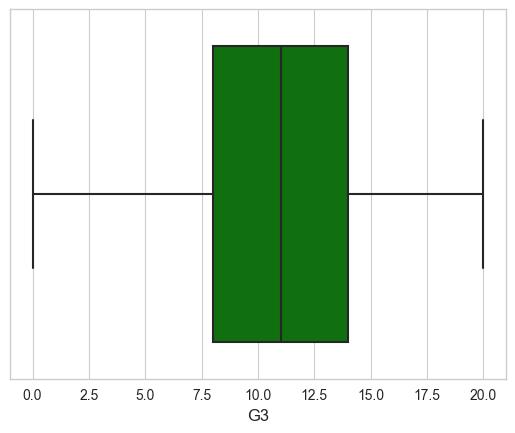

In [19]:
import seaborn as sns
sns.boxplot(x = 'G3', data = train_df, color = 'green')
plt.show()

In [20]:
q1 = train_df['G3'].quantile(0.25)
q3 = train_df['G3'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = train_df[(train_df['G3'] < lower_bound) | (train_df['G3'] > upper_bound)]

num_outliers = outliers.shape[0]
print("Number of outliers:", num_outliers)


Number of outliers: 0


In [21]:
train_df = train_df[(train_df['G3'] >= lower_bound) & (train_df['G3'] <= upper_bound)]

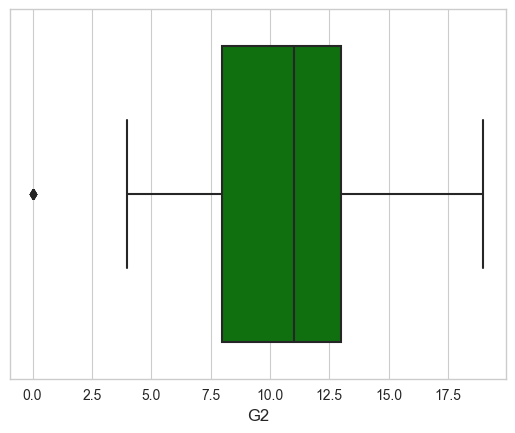

In [22]:
import seaborn as sns
sns.boxplot(x = 'G2', data = train_df, color = 'green')
plt.show()

In [23]:
q1 = train_df['G2'].quantile(0.25)
q3 = train_df['G2'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = train_df[(train_df['G2'] < lower_bound) | (train_df['G2'] > upper_bound)]

num_outliers = outliers.shape[0]
print("Number of outliers:", num_outliers)


Number of outliers: 10


In [24]:
train_df = train_df[(train_df['G2'] >= lower_bound) & (train_df['G2'] <= upper_bound)]

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# train
normalized_train = scaler.fit_transform(train_df)
train_df = pd.DataFrame(normalized_train, columns=train_df.columns)

# test
normalized_test = scaler.fit_transform(test_df)
test_df = pd.DataFrame(normalized_test, columns=test_df.columns)

In [26]:
from sklearn.model_selection import train_test_split

y_train = train_df['G3'].values
X_train = train_df.drop(columns=['G3']).values

y_test = test_df['G3'].values
X_test = test_df.drop(columns=['G3']).values


In [27]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

In [28]:
class Dataset(torch.utils.data.Dataset):
  
  def __init__(self, X, y, scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      if scale_data:
          X = StandardScaler().fit_transform(X)
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [29]:
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True, num_workers=0)

In [318]:
import torch
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_model(mlp, optimizer):
    mse_values = []
    mae_values = []
    r2_values = []
    mse_test = []
    mae_test = []
    r2_test = []

    for epoch in range(0, 100):
        print(f'Starting epoch {epoch+1}')
        current_loss = 0.0
        predictions = []
        true_labels = []
        
        for i, data in enumerate(trainloader, 0):
            inputs, targets = data
            inputs, targets = inputs.float(), targets.float()
            targets = targets.reshape((targets.shape[0], 1))

            optimizer.zero_grad()
            outputs = mlp(inputs)

            loss = loss_function(outputs, targets)
            loss.backward()
            optimizer.step()
            current_loss += loss.item()
            
            # Append predictions and true labels for computing metrics
            predictions.extend(outputs.detach().numpy())
            true_labels.extend(targets.detach().numpy())

            if i % 10 == 0:
                print('Loss after mini-batch %5d: %.3f' %
                    (i + 1, current_loss / 500))
                current_loss = 0.0
                
        # Calculate metrics after each epoch
        mse = mean_squared_error(true_labels, predictions)
        mae = mean_absolute_error(true_labels, predictions)
        r2 = r2_score(true_labels, predictions)
        
        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)

        mse, mae, r2 = test_model(mlp)
        mse_test.append(mse)
        mae_test.append(mae)
        r2_test.append(r2)
        mlp.train()
        
        print(f'Epoch {epoch+1} finished')
        print(f'Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R2 Score: {r2}')

    print('Training process has finished.')
    return mse_values, mae_values, r2_values, mse_test, mae_test, r2_test

In [319]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def test_model(mlp):
    mlp.eval()

    test_predictions = []
    true_labels = []

    for inputs, targets in testloader:

        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))
        with torch.no_grad():
            outputs = mlp(inputs)
        
        test_predictions.extend(outputs.numpy())
        true_labels.extend(targets.numpy())

    test_predictions = np.array(test_predictions)
    true_labels = np.array(true_labels)

    mse = mean_squared_error(true_labels, test_predictions)
    mae = mean_absolute_error(true_labels, test_predictions)
    r2 = r2_score(true_labels, test_predictions)

    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2)
    return mse, mae, r2


In [32]:
def plot_training(mse_values, mae_values, r2_values, color='red'):
    epochs = range(1, len(mse_values) + 1)

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot MSE
    axs[0].plot(epochs, mse_values, label='MSE', color=color)
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('MSE')
    axs[0].set_title('MSE over Epochs')
    axs[0].legend()

    # Plot MAE
    axs[1].plot(epochs, mae_values, label='MAE', color=color)
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('MAE')
    axs[1].set_title('MAE over Epochs')
    axs[1].legend()

    # Plot R2
    axs[2].plot(epochs, r2_values, label='R2', color=color)
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('R2')
    axs[2].set_title('R2 over Epochs')
    axs[2].legend()

    plt.tight_layout()
    plt.show()


In [33]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(41, 64),
      nn.ReLU(),
      nn.Linear(64, 128),
      nn.ReLU(),
      nn.Linear(128, 256),
      nn.ReLU(),
      nn.Linear(256, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [34]:
torch.manual_seed(42)

In [320]:
mlp = MLP()

loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [321]:
mse_values, mae_values, r2_values, mse, mae, r2 = train_model(mlp, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.011
Loss after mini-batch    21: 0.010
Loss after mini-batch    31: 0.009
Mean Squared Error: 0.25886434
Mean Absolute Error: 0.4718966
R2 Score: -3.6575681498281005
Epoch 1 finished
Mean Squared Error: 0.2588643431663513, Mean Absolute Error: 0.47189658880233765, R2 Score: -3.6575681498281005
Starting epoch 2
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.008
Loss after mini-batch    21: 0.006
Loss after mini-batch    31: 0.006
Mean Squared Error: 0.10989878
Mean Absolute Error: 0.2906198
R2 Score: -0.9773332537069355
Epoch 2 finished
Mean Squared Error: 0.10989878326654434, Mean Absolute Error: 0.29061979055404663, R2 Score: -0.9773332537069355
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.005
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.004
Mean Squared Error: 0.06463622
Mean Absolute Error: 0.1944155
R2 Score: -0.16295511519

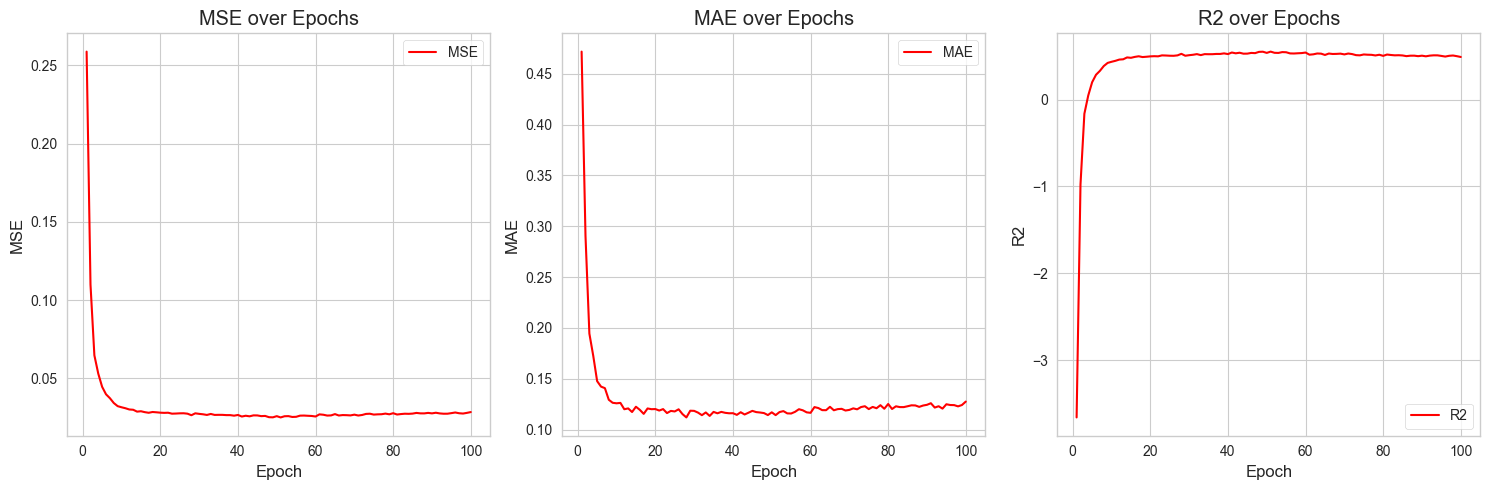

In [323]:
# test data
plot_training(mse, mae, r2)

In [36]:
mse_values, mae_values, r2_values = train_model(mlp, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.009
Loss after mini-batch    21: 0.008
Loss after mini-batch    31: 0.006
Epoch 1 finished
Mean Squared Error: 0.1911933571100235, Mean Absolute Error: 0.3915400505065918, R2 Score: -3.0876555757342805
Starting epoch 2
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.005
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.004
Epoch 2 finished
Mean Squared Error: 0.07529658079147339, Mean Absolute Error: 0.22335456311702728, R2 Score: -0.609817881652648
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.003
Epoch 3 finished
Mean Squared Error: 0.05273020640015602, Mean Absolute Error: 0.17703169584274292, R2 Score: -0.12735555311797775
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Loss after mini-bat

In [37]:
test_model(mlp)

Mean Squared Error: 0.022596426
Mean Absolute Error: 0.1142134
R2 Score: 0.5934380116665545


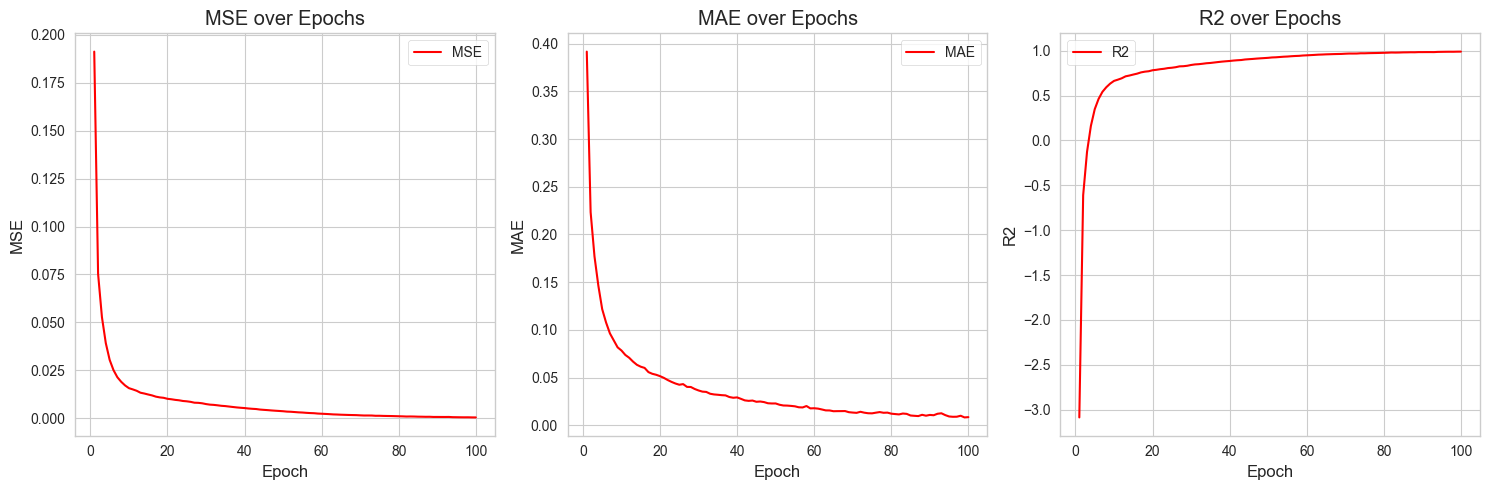

In [38]:
plot_training(mse_values, mae_values, r2_values, 'red')

## with l2 regularization

In [39]:
model2 = MLP()

loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-4, weight_decay=0.001)

In [40]:
mse_values, mae_values, r2_values = train_model(model2, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.011
Loss after mini-batch    21: 0.010
Loss after mini-batch    31: 0.009
Epoch 1 finished
Mean Squared Error: 0.28521907329559326, Mean Absolute Error: 0.4927802085876465, R2 Score: -5.09789636290787
Starting epoch 2
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.007
Loss after mini-batch    21: 0.006
Loss after mini-batch    31: 0.004
Epoch 2 finished
Mean Squared Error: 0.11186031252145767, Mean Absolute Error: 0.288011759519577, R2 Score: -1.3915390108692036
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.004
Epoch 3 finished
Mean Squared Error: 0.053526099771261215, Mean Absolute Error: 0.18325276672840118, R2 Score: -0.1443714883562779
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.003
Loss after mini-batch

In [41]:
test_model(model2)

Mean Squared Error: 0.022290315
Mean Absolute Error: 0.11380757
R2 Score: 0.5989456487078781


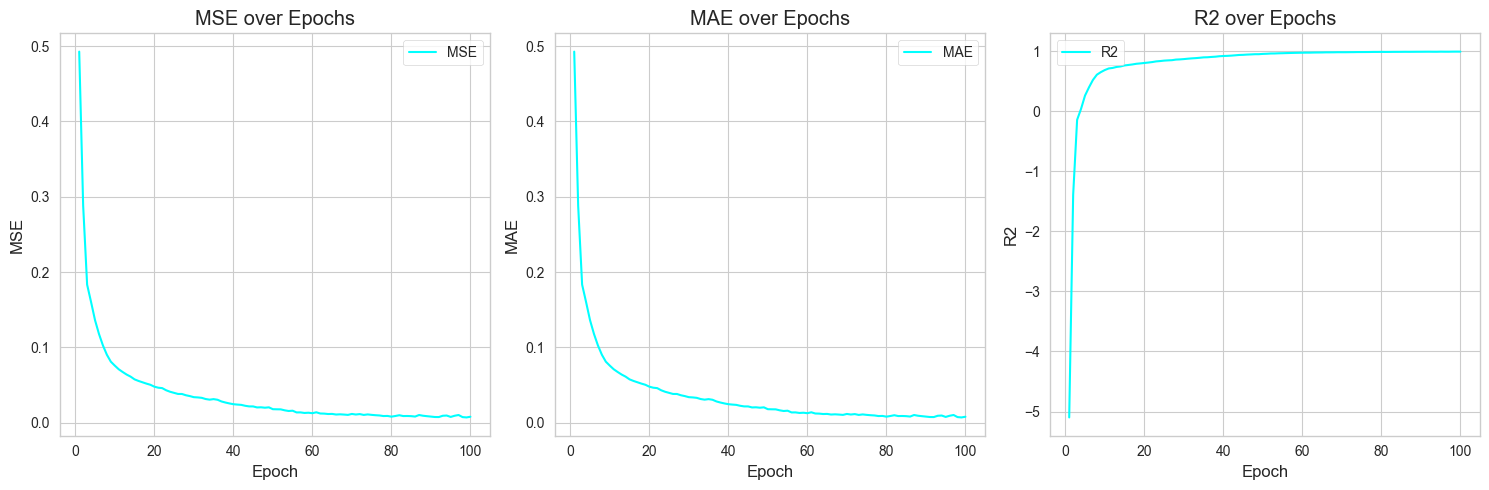

In [44]:
plot_training(mae_values, mae_values, r2_values, 'cyan')

## with dropout

In [273]:
class MLP_dropout(nn.Module):
  def __init__(self, dropout_prob=0.1):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(41, 64),
      nn.ReLU(),
      nn.Dropout(dropout_prob),
      nn.Linear(64, 128),
      nn.ReLU(),
      nn.Dropout(dropout_prob),
      nn.Linear(128, 256),
      nn.ReLU(),
      nn.Dropout(dropout_prob),
      nn.Linear(256, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [68]:
model3 = MLP_dropout()

loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-4, weight_decay=0.001)

In [69]:
mse_values, mae_values, r2_values = train_model(model3, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.009
Loss after mini-batch    21: 0.008
Loss after mini-batch    31: 0.006
Epoch 1 finished
Mean Squared Error: 0.18606562912464142, Mean Absolute Error: 0.39028096199035645, R2 Score: -2.97802595821118
Starting epoch 2
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.005
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.004
Epoch 2 finished
Mean Squared Error: 0.06834963709115982, Mean Absolute Error: 0.21775643527507782, R2 Score: -0.4612942023004001
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.003
Loss after mini-batch    31: 0.003
Epoch 3 finished
Mean Squared Error: 0.04816880077123642, Mean Absolute Error: 0.1689808964729309, R2 Score: -0.02983418550000705
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Loss after mini-bat

In [70]:
test_model(model3)

Mean Squared Error: 0.020590972
Mean Absolute Error: 0.112254605
R2 Score: 0.6295208140245825


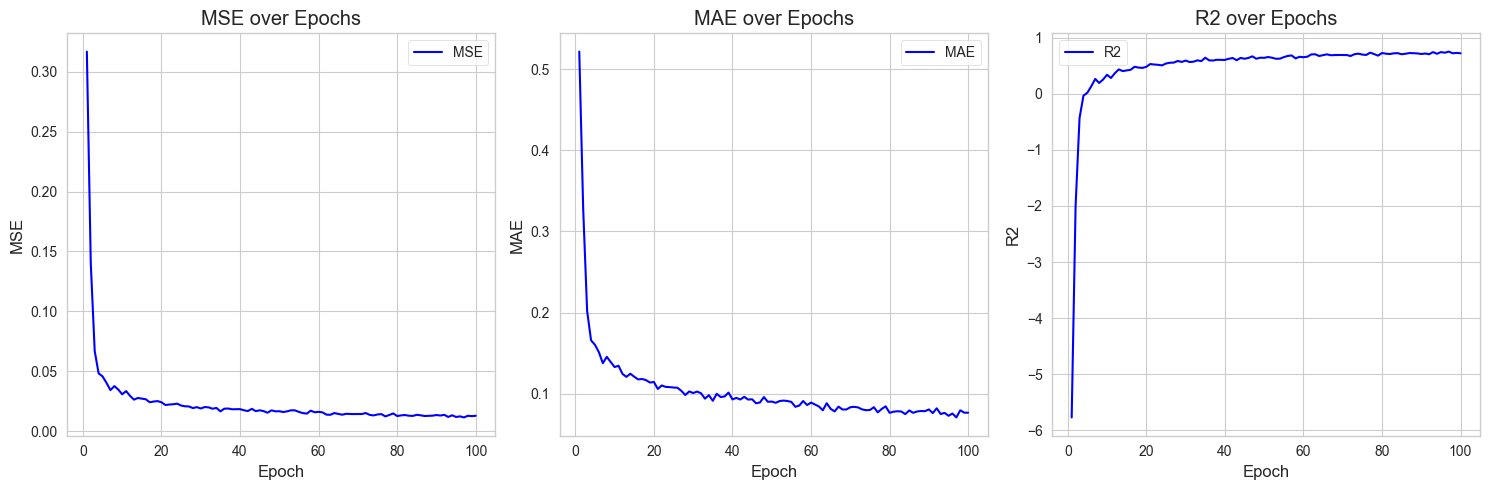

In [49]:
plot_training(mse_values, mae_values, r2_values, 'blue')

## dropout with additional layer

In [280]:
class MLP_dropout(nn.Module):
  def __init__(self, dropout_prob=0.2):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(41, 64),
      nn.ReLU(),
      nn.Dropout(dropout_prob),
      nn.Linear(64, 128),
      nn.ReLU(),
      nn.Dropout(dropout_prob),
      nn.Linear(128, 512),
      nn.ReLU(),
      nn.Dropout(dropout_prob),
      nn.Linear(512, 256),
      nn.ReLU(),
      nn.Dropout(dropout_prob),
      nn.Linear(256, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [281]:
model4 = MLP_dropout()

loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-4, weight_decay=0.001)

In [282]:
mse_values, mae_values, r2_values = train_model(model4, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.010
Loss after mini-batch    21: 0.008
Loss after mini-batch    31: 0.006
Epoch 1 finished
Mean Squared Error: 0.21227198839187622, Mean Absolute Error: 0.41383740305900574, R2 Score: -3.5383099477545503
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.004
Epoch 2 finished
Mean Squared Error: 0.06790407747030258, Mean Absolute Error: 0.2061394900083542, R2 Score: -0.4517682879825824
Starting epoch 3
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.003
Loss after mini-batch    31: 0.004
Epoch 3 finished
Mean Squared Error: 0.052945662289857864, Mean Absolute Error: 0.1770511418581009, R2 Score: -0.13196197106188778
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Loss after mini-b

In [283]:
test_model(model4)

Mean Squared Error: 0.023744931
Mean Absolute Error: 0.12071036
R2 Score: 0.5727737798917552


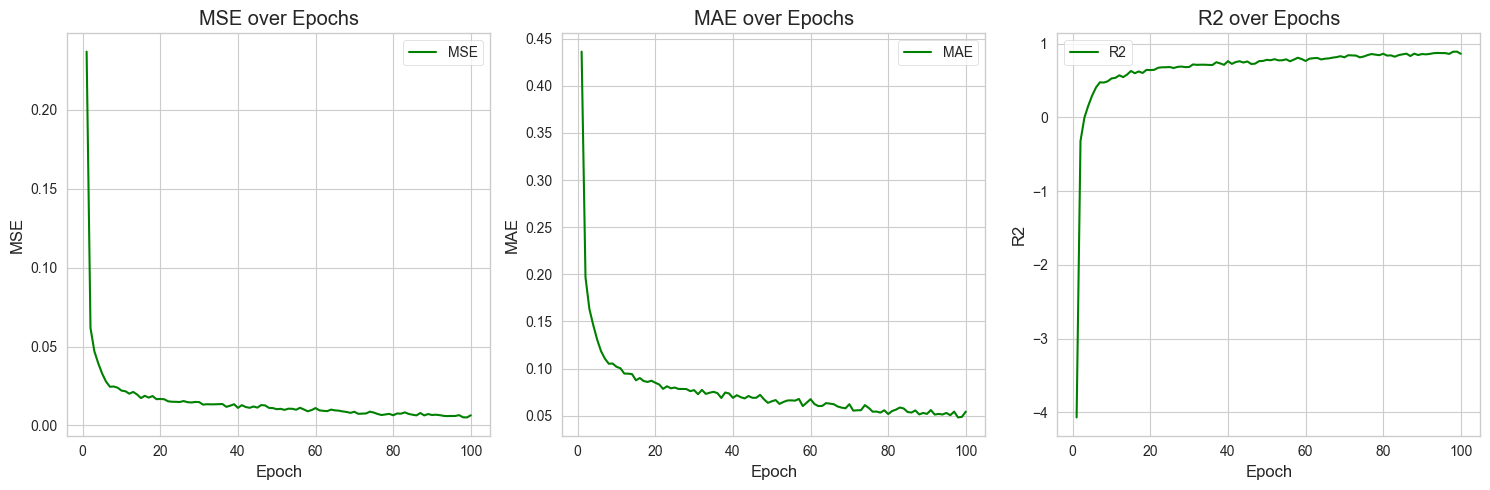

In [76]:
plot_training(mse_values, mae_values, r2_values, 'green')

## tanh activation function

In [324]:
class MLP_tanh(nn.Module):
  def __init__(self, dropout_prob=0.1):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(41, 64),
      nn.Tanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(64, 128),
      nn.Tanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(128, 256),
      nn.Tanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(256, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [325]:
model5 = MLP_tanh()
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model5.parameters(), lr=1e-4, weight_decay=0.001)

In [326]:
mse_values, mae_values, r2_values, mse, mae, r2 = train_model(model5, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.010
Loss after mini-batch    21: 0.009
Loss after mini-batch    31: 0.008
Mean Squared Error: 0.20136333
Mean Absolute Error: 0.40822712
R2 Score: -2.6229914632219895
Epoch 1 finished
Mean Squared Error: 0.20136332511901855, Mean Absolute Error: 0.4082271158695221, R2 Score: -2.6229914632219895
Starting epoch 2
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.007
Loss after mini-batch    21: 0.006
Loss after mini-batch    31: 0.005
Mean Squared Error: 0.077889815
Mean Absolute Error: 0.23248047
R2 Score: -0.4014178703293374
Epoch 2 finished
Mean Squared Error: 0.0778898149728775, Mean Absolute Error: 0.2324804663658142, R2 Score: -0.4014178703293374
Starting epoch 3
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.003
Mean Squared Error: 0.03333572
Mean Absolute Error: 0.13955761
R2 Score: 0.4002133695

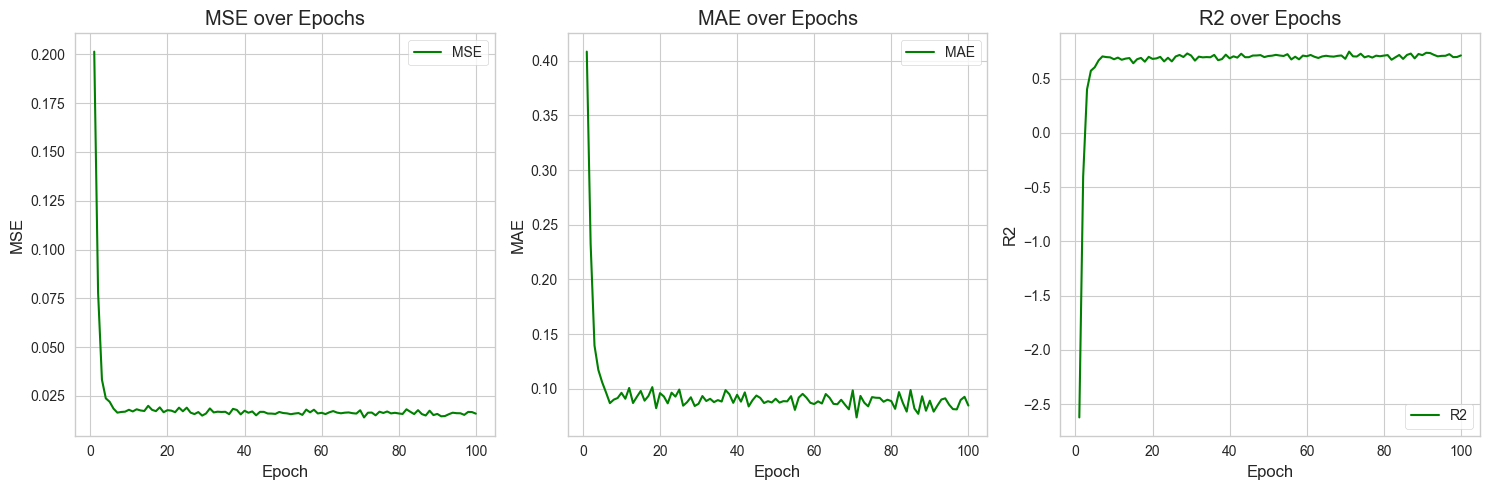

In [328]:
plot_training(mse, mae, r2, 'green')

In [81]:
mse_values, mae_values, r2_values = train_model(model5, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.008
Loss after mini-batch    21: 0.008
Loss after mini-batch    31: 0.006
Epoch 1 finished
Mean Squared Error: 0.15994536876678467, Mean Absolute Error: 0.36511170864105225, R2 Score: -2.419582630689947
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.005
Loss after mini-batch    21: 0.005
Loss after mini-batch    31: 0.003
Epoch 2 finished
Mean Squared Error: 0.0596437007188797, Mean Absolute Error: 0.20631259679794312, R2 Score: -0.27516408619851185
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Loss after mini-batch    31: 0.002
Epoch 3 finished
Mean Squared Error: 0.027835508808493614, Mean Absolute Error: 0.13052751123905182, R2 Score: 0.40488534311153945
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-b

In [82]:
test_model(model5)

Mean Squared Error: 0.015534445
Mean Absolute Error: 0.08382388
R2 Score: 0.7204994253143818


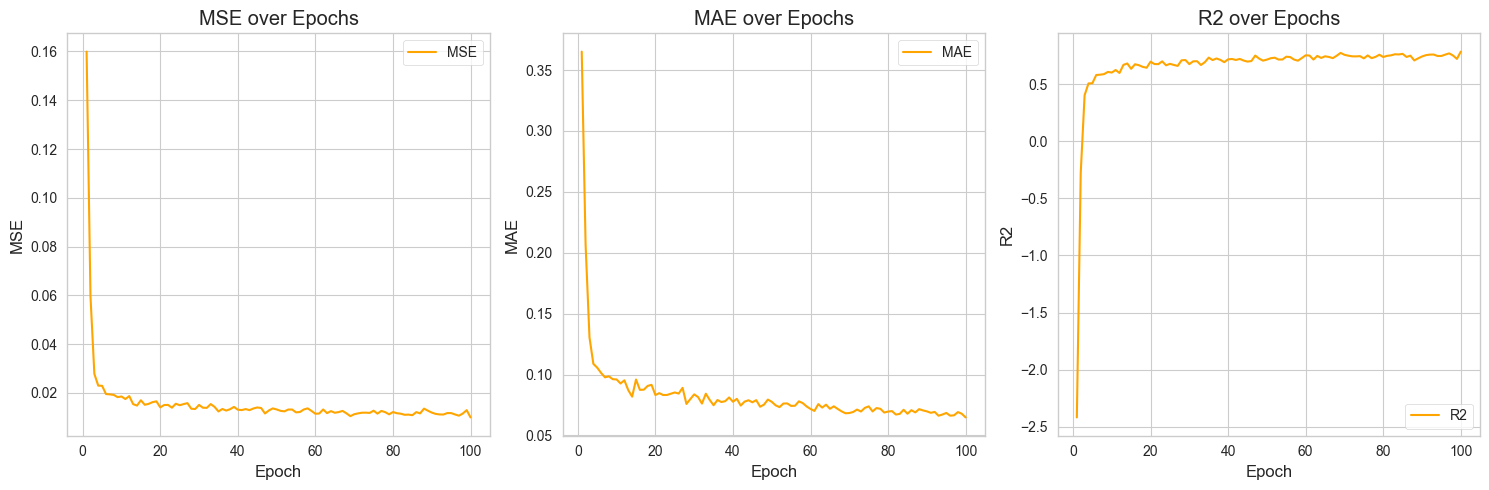

In [85]:
plot_training(mse_values, mae_values, r2_values, 'orange')

## with sigmoid

In [86]:
class MLP_sigmoid(nn.Module):
  def __init__(self, dropout_prob=0.1):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(41, 64),
      nn.Sigmoid(),
      nn.Dropout(dropout_prob),
      nn.Linear(64, 128),
      nn.Sigmoid(),
      nn.Dropout(dropout_prob),
      nn.Linear(128, 256),
      nn.Sigmoid(),
      nn.Dropout(dropout_prob),
      nn.Linear(256, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [87]:
model6 = MLP_sigmoid()
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model6.parameters(), lr=1e-4, weight_decay=0.001)

In [88]:
mse_values, mae_values, r2_values = train_model(model6, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.008
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.004
Epoch 1 finished
Mean Squared Error: 0.10513739287853241, Mean Absolute Error: 0.2557757496833801, R2 Score: -1.2478053841862962
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.004
Epoch 2 finished
Mean Squared Error: 0.055532798171043396, Mean Absolute Error: 0.18329142034053802, R2 Score: -0.18727422800952742
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.003
Loss after mini-batch    31: 0.004
Epoch 3 finished
Mean Squared Error: 0.059400882571935654, Mean Absolute Error: 0.18393965065479279, R2 Score: -0.2699726401957825
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.004
Loss after mini

In [89]:
test_model(model6)

Mean Squared Error: 0.020751942
Mean Absolute Error: 0.08680644
R2 Score: 0.6266245536436741


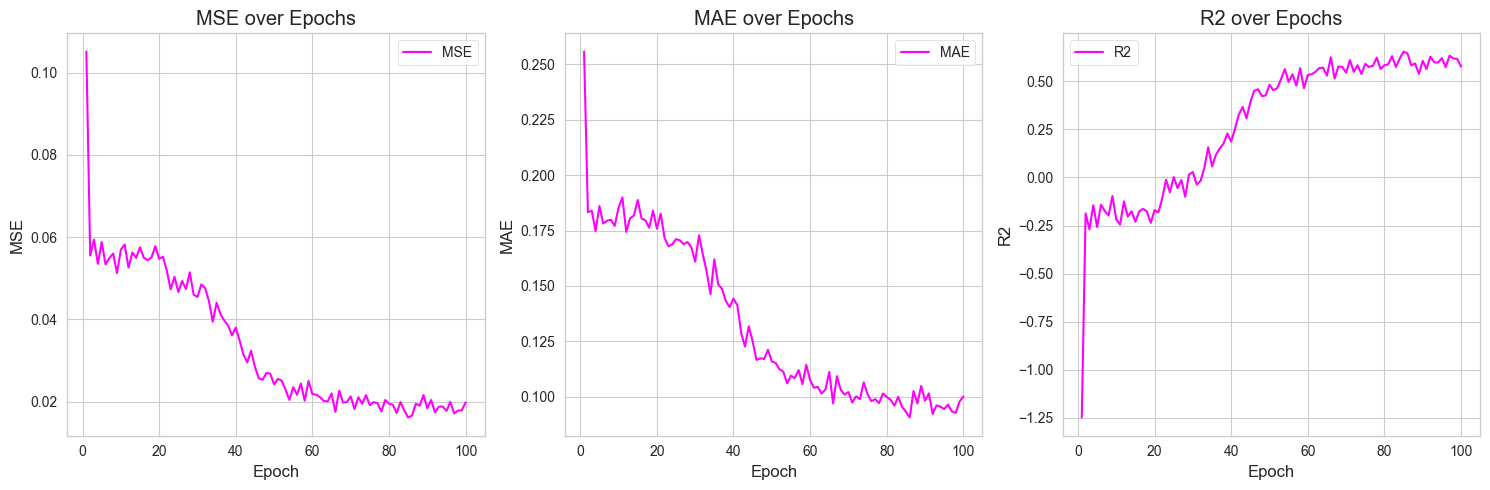

In [90]:
plot_training(mse_values, mae_values, r2_values, 'magenta')

## leaky relu

In [91]:
class MLP_leaky(nn.Module):
  def __init__(self, dropout_prob=0.1):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(41, 64),
      nn.LeakyReLU(),
      nn.Dropout(dropout_prob),
      nn.Linear(64, 128),
      nn.LeakyReLU(),
      nn.Dropout(dropout_prob),
      nn.Linear(128, 256),
      nn.LeakyReLU(),
      nn.Dropout(dropout_prob),
      nn.Linear(256, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [93]:
model7  = MLP_leaky()
optimizer = torch.optim.Adam(model7.parameters(), lr=1e-4, weight_decay=0.001)

In [94]:
mse_values, mae_values, r2_values = train_model(model7, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.007
Loss after mini-batch    21: 0.007
Loss after mini-batch    31: 0.005
Epoch 1 finished
Mean Squared Error: 0.12968137860298157, Mean Absolute Error: 0.3190944790840149, R2 Score: -1.7725479259220376
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.003
Epoch 2 finished
Mean Squared Error: 0.05976494774222374, Mean Absolute Error: 0.1987968236207962, R2 Score: -0.27775626676060905
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.003
Loss after mini-batch    31: 0.003
Epoch 3 finished
Mean Squared Error: 0.05016280338168144, Mean Absolute Error: 0.16764405369758606, R2 Score: -0.07246527169275097
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Loss after mini-b

In [95]:
test_model(model7)

Mean Squared Error: 0.02172223
Mean Absolute Error: 0.11421287
R2 Score: 0.60916681271292


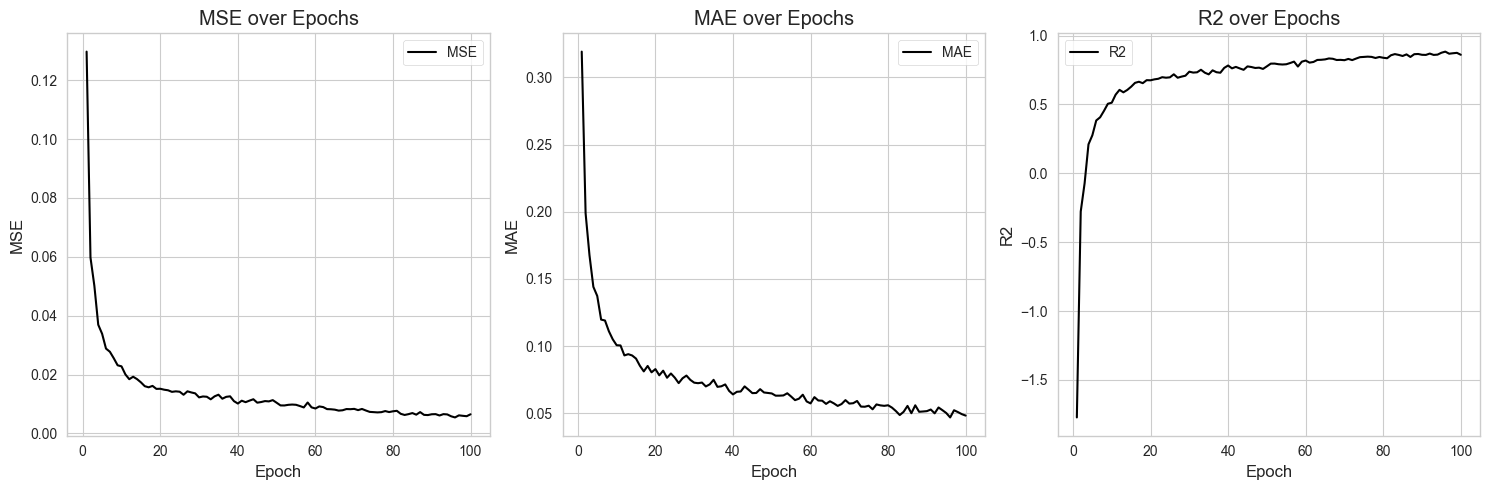

In [96]:
plot_training(mse_values, mae_values, r2_values, 'black')

## with sgd

In [329]:
model8 = MLP_tanh()
optimizer = torch.optim.SGD(model8.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

In [105]:
mse_values, mae_values, r2_values = train_model(model8, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.005
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.003
Epoch 1 finished
Mean Squared Error: 0.07890824973583221, Mean Absolute Error: 0.21461783349514008, R2 Score: -0.6870339153406644
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-batch    31: 0.002
Epoch 2 finished
Mean Squared Error: 0.024510735645890236, Mean Absolute Error: 0.11427118629217148, R2 Score: 0.4759680181555933
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-batch    31: 0.002
Epoch 3 finished
Mean Squared Error: 0.020086748525500298, Mean Absolute Error: 0.10467381030321121, R2 Score: 0.5705514977958852
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-b

In [330]:
mse_values, mae_values, r2_values, mse, mae, r2 = train_model(model8, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.006
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.004
Mean Squared Error: 0.03827454
Mean Absolute Error: 0.146906
R2 Score: 0.3113525405509959
Epoch 1 finished
Mean Squared Error: 0.03827454149723053, Mean Absolute Error: 0.14690600335597992, R2 Score: 0.3113525405509959
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Loss after mini-batch    31: 0.002
Mean Squared Error: 0.032254864
Mean Absolute Error: 0.1207755
R2 Score: 0.4196604943548037
Epoch 2 finished
Mean Squared Error: 0.032254863530397415, Mean Absolute Error: 0.1207754984498024, R2 Score: 0.4196604943548037
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-batch    31: 0.002
Mean Squared Error: 0.027233342
Mean Absolute Error: 0.12705629
R2 Score: 0.5100091638206

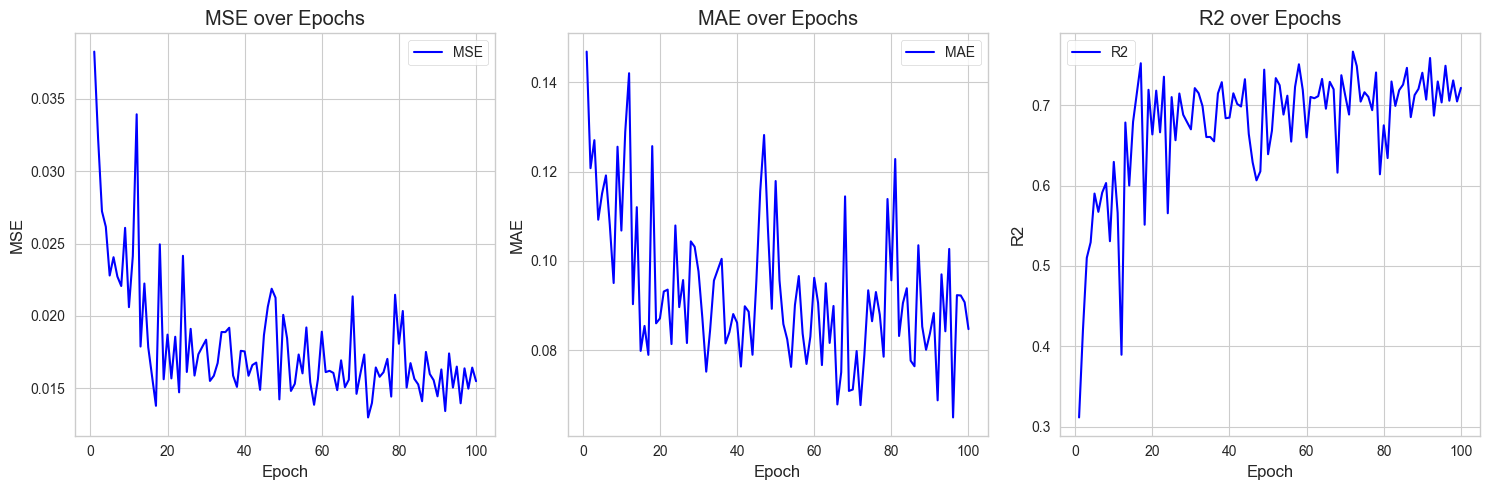

In [332]:
# test plot
plot_training(mse, mae, r2, 'blue')

In [106]:
test_model(model8)

Mean Squared Error: 0.014364576
Mean Absolute Error: 0.07520748
R2 Score: 0.7415480627547395


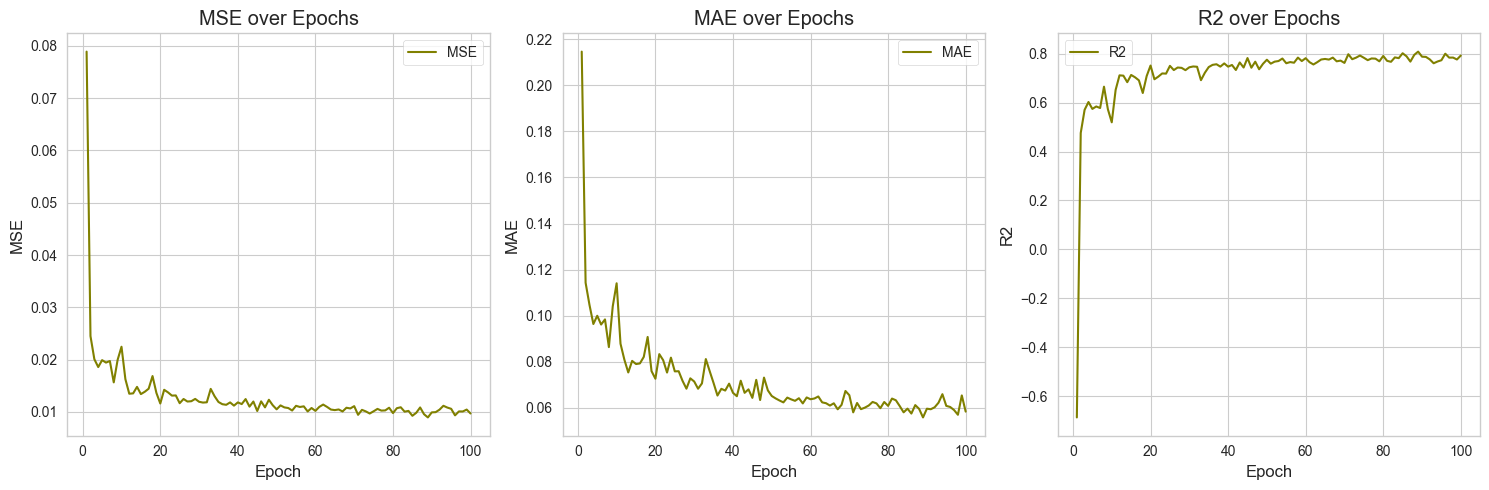

In [107]:
plot_training(mse_values, mae_values, r2_values, 'olive')

## batch normalization

In [310]:
class MLP_batch_normal(nn.Module):
  def __init__(self, dropout_prob=0.1):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(41, 64),
      # nn.BatchNorm1d(64),
      nn.Tanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(64, 128),
      # nn.BatchNorm1d(128),
      nn.Tanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(128, 256),
      nn.BatchNorm1d(256),
      nn.Tanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(256, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [311]:
model9 = MLP_batch_normal()
optimizer = torch.optim.Adam(model9.parameters(), lr=0.01, weight_decay=0.001)

In [312]:
mse_values, mae_values, r2_values = train_model(model9, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.028
Loss after mini-batch    21: 0.014
Loss after mini-batch    31: 0.008
Epoch 1 finished
Mean Squared Error: 1.430344581604004, Mean Absolute Error: 0.8352543711662292, R2 Score: -29.580329532797727
Starting epoch 2
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.008
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.004
Epoch 2 finished
Mean Squared Error: 0.13705530762672424, Mean Absolute Error: 0.2784159481525421, R2 Score: -1.9302003324408314
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.007
Loss after mini-batch    21: 0.006
Loss after mini-batch    31: 0.006
Epoch 3 finished
Mean Squared Error: 0.1339983195066452, Mean Absolute Error: 0.29458191990852356, R2 Score: -1.864842755608079
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Loss after mini-batch  

In [304]:
test_model(model9)

Mean Squared Error: 0.023956357
Mean Absolute Error: 0.114968024
R2 Score: 0.5689697641346463


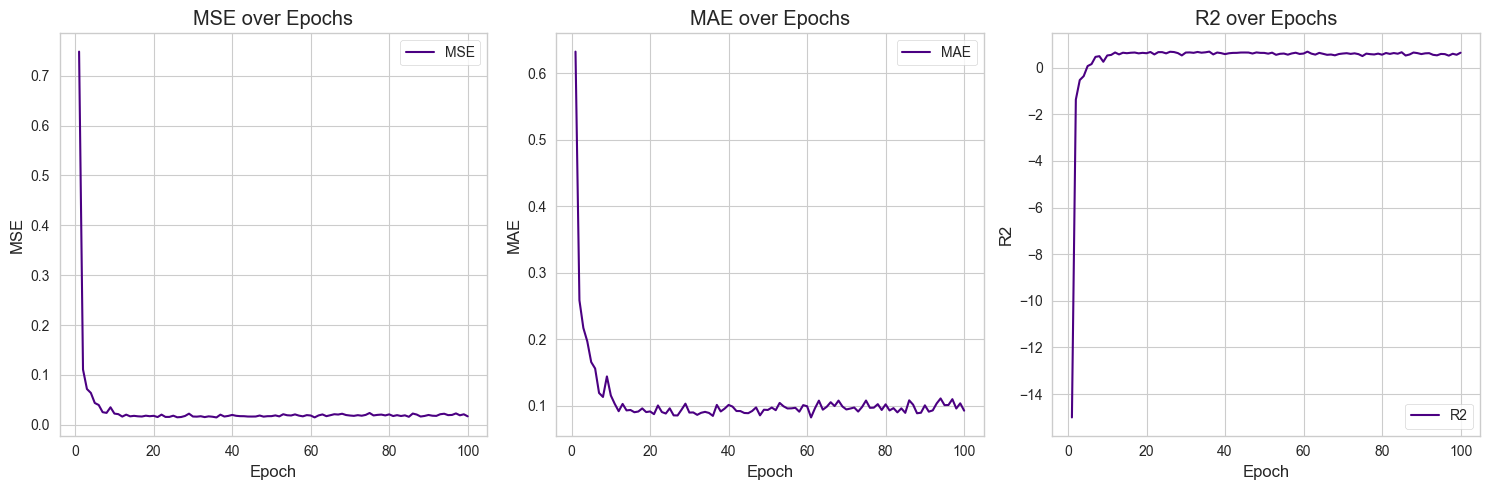

In [305]:
plot_training(mse_values, mae_values, r2_values, 'indigo')

## mlp more layers

In [198]:
class MLP_limited(nn.Module):
  def __init__(self, dropout_prob=0.15):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(41, 64),
      nn.Tanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(64, 128),
      nn.Tanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(128, 512),
      nn.Tanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(512, 256),
      nn.Tanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(256, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [199]:
model10 = MLP_limited()
optimizer = torch.optim.SGD(model10.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

In [200]:
mse_values, mae_values, r2_values = train_model(model10, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.006
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.003
Epoch 1 finished
Mean Squared Error: 0.09508658945560455, Mean Absolute Error: 0.23995959758758545, R2 Score: -1.0329219799268095
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-batch    31: 0.002
Epoch 2 finished
Mean Squared Error: 0.021789373829960823, Mean Absolute Error: 0.1092880442738533, R2 Score: 0.5341498944708735
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-batch    31: 0.002
Epoch 3 finished
Mean Squared Error: 0.019746974110603333, Mean Absolute Error: 0.10053669661283493, R2 Score: 0.5778157780270314
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-ba

In [201]:
test_model(model10)

Mean Squared Error: 0.014603795
Mean Absolute Error: 0.07748335
R2 Score: 0.7372439528892245


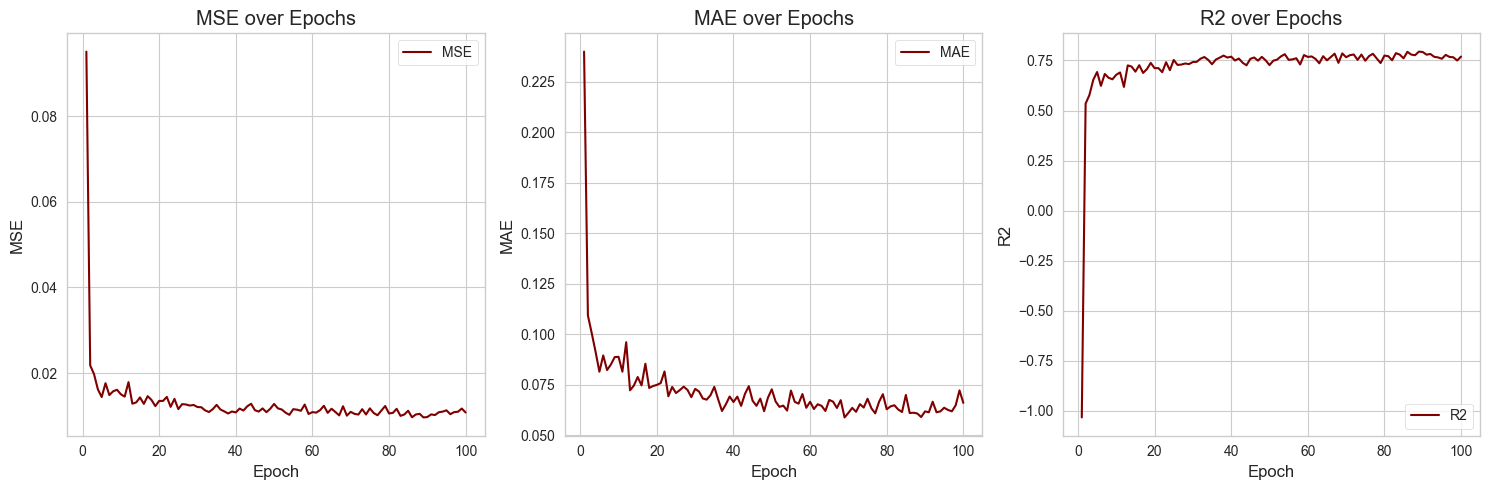

In [202]:
plot_training(mse_values, mae_values, r2_values, 'maroon')

## gelu

In [215]:
class MLP_gelu(nn.Module):
  def __init__(self, dropout_prob=0.1):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(41, 64),
      nn.GELU(),
      nn.Dropout(dropout_prob),
      nn.Linear(64, 128),
      nn.GELU(),
      nn.Dropout(dropout_prob),
      nn.Linear(128, 256),
      nn.GELU(),
      nn.Dropout(dropout_prob),
      nn.Linear(256, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [216]:
model11 = MLP_gelu()
optimizer = torch.optim.SGD(model11.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

In [217]:
mse_values, mae_values, r2_values = train_model(model11, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.007
Loss after mini-batch    21: 0.004
Loss after mini-batch    31: 0.003
Epoch 1 finished
Mean Squared Error: 0.09496429562568665, Mean Absolute Error: 0.245620995759964, R2 Score: -1.0303075074797041
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Loss after mini-batch    31: 0.002
Epoch 2 finished
Mean Squared Error: 0.03902152180671692, Mean Absolute Error: 0.1443554013967514, R2 Score: 0.16573181372778334
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-batch    31: 0.002
Epoch 3 finished
Mean Squared Error: 0.024019572883844376, Mean Absolute Error: 0.1062866672873497, R2 Score: 0.48646889588223563
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-batc

In [218]:
test_model(model11)

Mean Squared Error: 0.017056882
Mean Absolute Error: 0.08528805
R2 Score: 0.6931072421214521


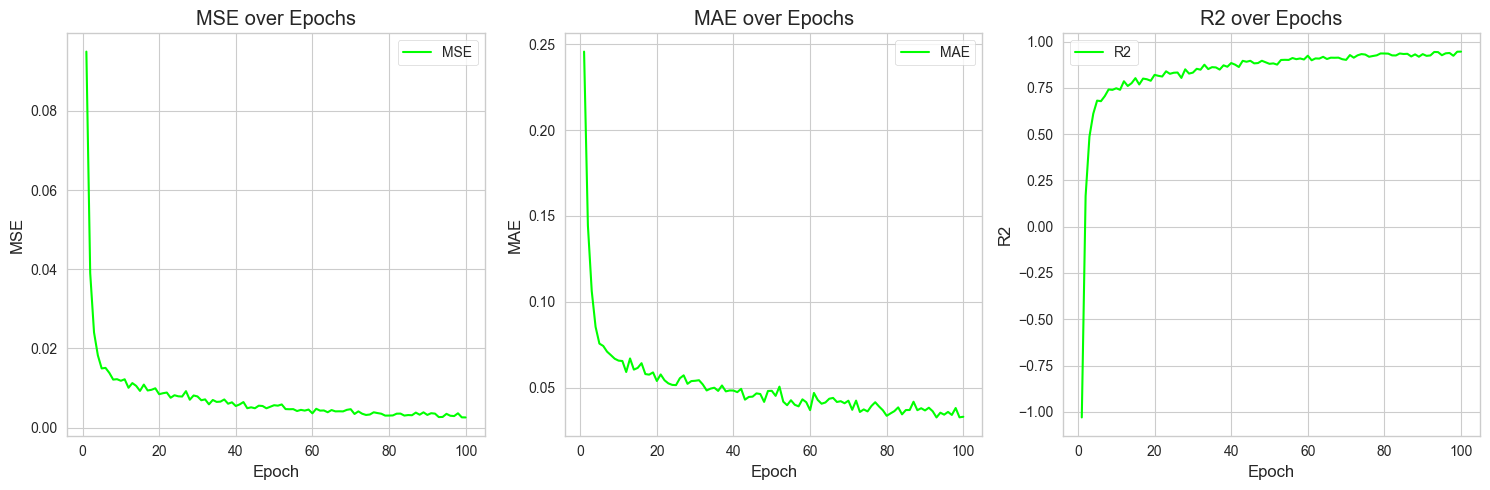

In [220]:
plot_training(mse_values, mae_values, r2_values, 'lime')

## scaled tanh

In [247]:
import torch
import torch.nn as nn

class ScaledTanh(nn.Module):
    def __init__(self, scale_factor=0.5):
        super(ScaledTanh, self).__init__()
        self.scale_factor = scale_factor

    def forward(self, x):
        return self.scale_factor * torch.tanh(x)



In [315]:
class MLP_tanh_scaled(nn.Module):
  def __init__(self, dropout_prob=0.1):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(41, 64),
      ScaledTanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(64, 128),
      ScaledTanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(128, 256),
      ScaledTanh(),
      nn.Dropout(dropout_prob),
      nn.Linear(256, 1)
    )


  def forward(self, x):
    return self.layers(x)

In [316]:
model12 = MLP_tanh_scaled()
optimizer = torch.optim.SGD(model12.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

In [250]:
mse_values, mae_values, r2_values = train_model(model12, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.008
Loss after mini-batch    21: 0.005
Loss after mini-batch    31: 0.003
Epoch 1 finished
Mean Squared Error: 0.12140633165836334, Mean Absolute Error: 0.2743074893951416, R2 Score: -1.595629827638843
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Loss after mini-batch    31: 0.003
Epoch 2 finished
Mean Squared Error: 0.04075092822313309, Mean Absolute Error: 0.1480179876089096, R2 Score: 0.12875766971477554
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Loss after mini-batch    31: 0.002
Epoch 3 finished
Mean Squared Error: 0.030902737751603127, Mean Absolute Error: 0.12191211432218552, R2 Score: 0.33930895384144466
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-bat

In [251]:
test_model(model12)

Mean Squared Error: 0.014931433
Mean Absolute Error: 0.08223872
R2 Score: 0.7313489800295014


In [258]:
model12 = MLP_tanh_scaled()
optimizer = torch.optim.SGD(model12.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

In [259]:
mse_values, mae_values, r2_values = train_model(model12, optimizer)

Starting epoch 1
Loss after mini-batch     1: 0.001
Loss after mini-batch    11: 0.008
Loss after mini-batch    21: 0.003
Loss after mini-batch    31: 0.003
Epoch 1 finished
Mean Squared Error: 0.11968071758747101, Mean Absolute Error: 0.26465946435928345, R2 Score: -1.5587371609276528
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Loss after mini-batch    31: 0.003
Epoch 2 finished
Mean Squared Error: 0.04130703955888748, Mean Absolute Error: 0.15247303247451782, R2 Score: 0.11686820164062683
Starting epoch 3
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Loss after mini-batch    31: 0.002
Epoch 3 finished
Mean Squared Error: 0.029368340969085693, Mean Absolute Error: 0.12110570818185806, R2 Score: 0.3721138443413653
Starting epoch 4
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-b

In [260]:
test_model(model12)

Mean Squared Error: 0.013751178
Mean Absolute Error: 0.07862977
R2 Score: 0.7525845078135946


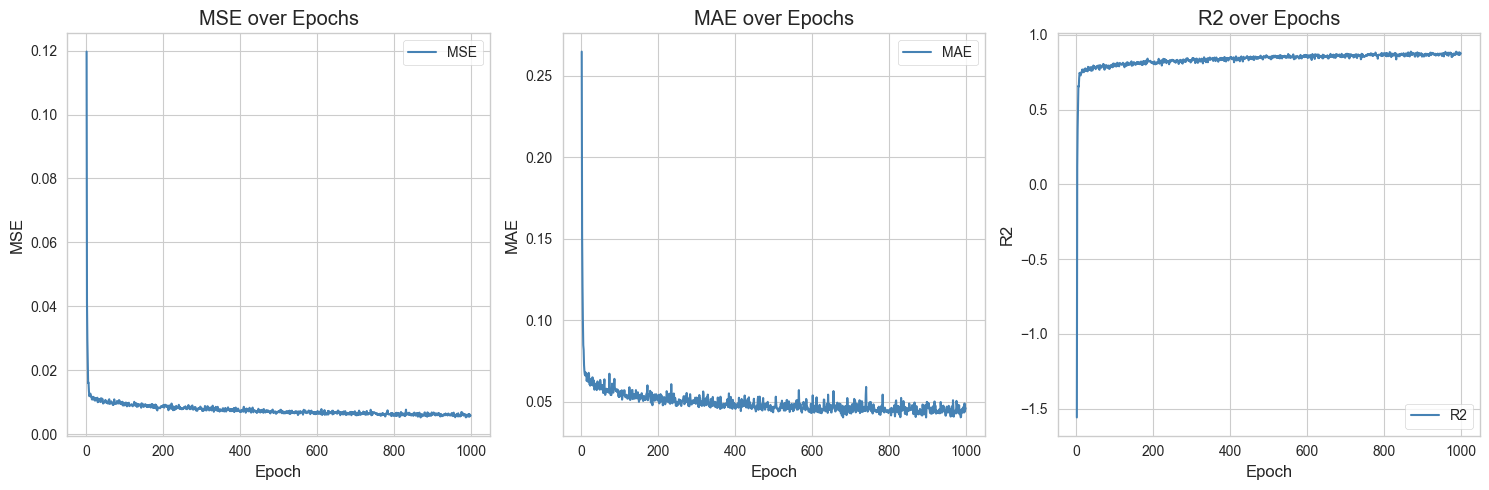

In [263]:
plot_training(mse_values, mae_values, r2_values, "steelblue")